In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.impute import KNNImputer
import datetime
from sklearn.decomposition import PCA
from joblib import dump

In [2]:
df = pd.read_csv("/content/sampled_dataset.csv")

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day_of_Month', 'Month'],
      dtype='object')

In [4]:
len(df)

29092

In [5]:
df["Location"].value_counts()

Location
Sydney              721
Perth               663
Canberra            658
Richmond            651
Bendigo             642
Darwin              633
Mildura             630
Adelaide            629
SalmonGums          629
Melbourne           627
PearceRAAF          627
SydneyAirport       623
Watsonia            623
AliceSprings        621
Hobart              621
Williamtown         619
Albury              619
Woomera             618
Walpole             616
WaggaWagga          616
Dartmoor            614
Townsville          612
Wollongong          610
GoldCoast           609
MelbourneAirport    608
Brisbane            606
Launceston          601
Ballarat            601
Penrith             599
Nuriootpa           599
NorfolkIsland       599
MountGinini         598
Cobar               598
Newcastle           597
Moree               595
Tuggeranong         593
Witchcliffe         593
MountGambier        589
CoffsHarbour        587
Cairns              585
Albany              585
Portlan

In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day_of_Month,Month
0,2012-04-22,MountGambier,15.0,18.9,4.20,6.60,8.00,NNW,54.0,NNW,...,1005.20,1003.7,4.0,5.0,17.3,17.6,Yes,Yes,22,4.0
1,2008-03-30,Sydney,13.1,26.8,0.00,4.60,10.90,W,39.8,W,...,1013.00,1009.0,0.0,1.0,16.9,25.9,No,No,30,3.0
2,2011-12-10,Melbourne,19.0,29.0,0.56,11.00,5.60,N,59.0,N,...,1006.50,1003.4,3.6,2.4,24.2,27.2,No,No,10,12.0
3,2013-03-27,Richmond,18.1,32.2,0.00,2.10,11.64,NE,30.0,N,...,1019.20,1014.6,5.8,1.8,20.9,31.6,No,No,27,3.0
4,2010-10-25,Sydney,13.9,19.6,14.00,1.20,5.40,SSW,50.0,SW,...,1015.56,1018.4,7.0,6.0,15.5,19.1,Yes,No,25,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,2014-09-24,Ballarat,10.8,19.7,0.00,5.00,6.28,N,43.0,NE,...,1017.50,1013.7,5.0,8.0,16.3,17.2,No,Yes,24,9.0
29088,2008-08-29,Sydney,8.7,18.2,0.00,4.20,10.10,W,45.8,WNW,...,1025.70,1022.3,2.0,4.0,12.5,16.1,No,No,29,8.0
29089,2016-11-26,Newcastle,14.5,25.2,0.00,4.60,10.06,W,39.4,NW,...,1018.72,1015.8,4.0,4.8,22.5,23.7,No,No,26,11.0
29090,2013-04-23,Walpole,12.7,20.6,0.80,6.96,6.68,WNW,31.0,NNW,...,1020.40,1020.4,7.6,7.0,15.9,19.2,No,No,23,4.0


In [7]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day_of_Month     0
Month            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29092 entries, 0 to 29091
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           29092 non-null  object 
 1   Location       29092 non-null  object 
 2   MinTemp        29092 non-null  float64
 3   MaxTemp        29092 non-null  float64
 4   Rainfall       29092 non-null  float64
 5   Evaporation    29092 non-null  float64
 6   Sunshine       29092 non-null  float64
 7   WindGustDir    29092 non-null  object 
 8   WindGustSpeed  29092 non-null  float64
 9   WindDir9am     29092 non-null  object 
 10  WindDir3pm     29092 non-null  object 
 11  WindSpeed9am   29092 non-null  float64
 12  WindSpeed3pm   29092 non-null  float64
 13  Humidity9am    29092 non-null  float64
 14  Humidity3pm    29092 non-null  float64
 15  Pressure9am    29092 non-null  float64
 16  Pressure3pm    29092 non-null  float64
 17  Cloud9am       29092 non-null  float64
 18  Cloud3

In [9]:
df.drop(columns="Date", inplace=True)

In [10]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day_of_Month,Month
0,MountGambier,15.0,18.9,4.20,6.60,8.00,NNW,54.0,NNW,NW,...,1005.20,1003.7,4.0,5.0,17.3,17.6,Yes,Yes,22,4.0
1,Sydney,13.1,26.8,0.00,4.60,10.90,W,39.8,W,WNW,...,1013.00,1009.0,0.0,1.0,16.9,25.9,No,No,30,3.0
2,Melbourne,19.0,29.0,0.56,11.00,5.60,N,59.0,N,N,...,1006.50,1003.4,3.6,2.4,24.2,27.2,No,No,10,12.0
3,Richmond,18.1,32.2,0.00,2.10,11.64,NE,30.0,N,NE,...,1019.20,1014.6,5.8,1.8,20.9,31.6,No,No,27,3.0
4,Sydney,13.9,19.6,14.00,1.20,5.40,SSW,50.0,SW,S,...,1015.56,1018.4,7.0,6.0,15.5,19.1,Yes,No,25,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,Ballarat,10.8,19.7,0.00,5.00,6.28,N,43.0,NE,NNE,...,1017.50,1013.7,5.0,8.0,16.3,17.2,No,Yes,24,9.0
29088,Sydney,8.7,18.2,0.00,4.20,10.10,W,45.8,WNW,SSE,...,1025.70,1022.3,2.0,4.0,12.5,16.1,No,No,29,8.0
29089,Newcastle,14.5,25.2,0.00,4.60,10.06,W,39.4,NW,SE,...,1018.72,1015.8,4.0,4.8,22.5,23.7,No,No,26,11.0
29090,Walpole,12.7,20.6,0.80,6.96,6.68,WNW,31.0,NNW,WSW,...,1020.40,1020.4,7.6,7.0,15.9,19.2,No,No,23,4.0


In [11]:
df = pd.read_csv("/content/sampled_dataset_encoding.csv")

In [12]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day_of_Month,Month
0,22,15.0,18.9,4.20,6.60,8.00,6,54.0,6,7,...,1005.20,1003.7,4.0,5.0,17.3,17.6,1,1,22,4.0
1,37,13.1,26.8,0.00,4.60,10.90,13,39.8,13,14,...,1013.00,1009.0,0.0,1.0,16.9,25.9,0,0,30,3.0
2,18,19.0,29.0,0.56,11.00,5.60,3,59.0,3,3,...,1006.50,1003.4,3.6,2.4,24.2,27.2,0,0,10,12.0
3,34,18.1,32.2,0.00,2.10,11.64,4,30.0,3,4,...,1019.20,1014.6,5.8,1.8,20.9,31.6,0,0,27,3.0
4,37,13.9,19.6,14.00,1.20,5.40,11,50.0,12,8,...,1015.56,1018.4,7.0,6.0,15.5,19.1,1,0,25,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,5,10.8,19.7,0.00,5.00,6.28,3,43.0,4,5,...,1017.50,1013.7,5.0,8.0,16.3,17.2,0,1,24,9.0
29088,37,8.7,18.2,0.00,4.20,10.10,13,45.8,14,10,...,1025.70,1022.3,2.0,4.0,12.5,16.1,0,0,29,8.0
29089,24,14.5,25.2,0.00,4.60,10.06,13,39.4,7,9,...,1018.72,1015.8,4.0,4.8,22.5,23.7,0,0,26,11.0
29090,43,12.7,20.6,0.80,6.96,6.68,14,31.0,6,15,...,1020.40,1020.4,7.6,7.0,15.9,19.2,0,0,23,4.0


In [13]:
df["RainTomorrow"].value_counts()

RainTomorrow
0    22672
1     6420
Name: count, dtype: int64

In [14]:
df.iloc[17]

Location           30.00
MinTemp            10.50
MaxTemp            19.40
Rainfall            4.80
Evaporation         4.52
Sunshine            7.56
WindGustDir        14.00
WindGustSpeed      56.00
WindDir9am          3.00
WindDir3pm         14.00
WindSpeed9am       20.00
WindSpeed3pm       28.00
Humidity9am        46.00
Humidity3pm        31.00
Pressure9am      1015.62
Pressure3pm      1012.40
Cloud9am            3.40
Cloud3pm            3.40
Temp9am            13.60
Temp3pm            18.60
RainToday           1.00
RainTomorrow        0.00
Day_of_Month       24.00
Month               8.00
Name: 17, dtype: float64

In [15]:
# df["Location"].value_counts() # 0 to 48
# df["WindGustDir"].value_counts() # 0 to 15
# df["WindDir9am"].value_counts() # 0 to 15


In [16]:
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [17]:
# Instantiate SMOTE
smote = SMOTE()

# Perform resampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balanced dataset
print("Balanced dataset:")
print(X_resampled)
print(y_resampled)

Balanced dataset:
       Location    MinTemp    MaxTemp   Rainfall  Evaporation   Sunshine  \
0            22  15.000000  18.900000   4.200000     6.600000   8.000000   
1            37  13.100000  26.800000   0.000000     4.600000  10.900000   
2            18  19.000000  29.000000   0.560000    11.000000   5.600000   
3            34  18.100000  32.200000   0.000000     2.100000  11.640000   
4            37  13.900000  19.600000  14.000000     1.200000   5.400000   
...         ...        ...        ...        ...          ...        ...   
45339        42  20.456129  29.243871   0.000000     6.192540   7.396375   
45340        13  25.000000  33.548628   0.000000     9.610974   6.609414   
45341        43  12.633529  19.881653   0.528722     5.556929   6.377503   
45342        29   9.160409  18.588055   0.363549     3.218294   6.312287   
45343         1  10.059254  18.781825   0.377096     2.964980   4.576764   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humid

In [18]:
# Now size of dataset after balancing the minority class
# [45344 rows x 23 columns]

In [19]:
y_resampled.value_counts()

RainTomorrow
1    22672
0    22672
Name: count, dtype: int64

In [20]:
balanced_df = X_resampled.copy()

In [21]:
balanced_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day_of_Month,Month
0,22,15.000000,18.900000,4.200000,6.600000,8.000000,6,54.000000,6,7,...,64.000000,1005.200000,1003.700000,4.000000,5.000000,17.300000,17.600000,1,22,4.000000
1,37,13.100000,26.800000,0.000000,4.600000,10.900000,13,39.800000,13,14,...,22.000000,1013.000000,1009.000000,0.000000,1.000000,16.900000,25.900000,0,30,3.000000
2,18,19.000000,29.000000,0.560000,11.000000,5.600000,3,59.000000,3,3,...,38.000000,1006.500000,1003.400000,3.600000,2.400000,24.200000,27.200000,0,10,12.000000
3,34,18.100000,32.200000,0.000000,2.100000,11.640000,4,30.000000,3,4,...,51.000000,1019.200000,1014.600000,5.800000,1.800000,20.900000,31.600000,0,27,3.000000
4,37,13.900000,19.600000,14.000000,1.200000,5.400000,11,50.000000,12,8,...,64.000000,1015.560000,1018.400000,7.000000,6.000000,15.500000,19.100000,1,25,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45339,42,20.456129,29.243871,0.000000,6.192540,7.396375,6,37.000000,7,1,...,65.962701,1013.300000,1010.764476,6.785081,6.785081,22.653286,25.914919,0,28,9.214919
45340,13,25.000000,33.548628,0.000000,9.610974,6.609414,5,32.756859,5,13,...,53.364712,1013.066272,1007.890586,5.243141,1.243141,28.697256,32.860785,0,2,10.121571
45341,43,12.633529,19.881653,0.528722,5.556929,6.377503,8,33.000000,0,10,...,74.103752,1022.202403,1020.948417,6.000000,6.085111,15.934584,18.846014,0,6,4.287221
45342,29,9.160409,18.588055,0.363549,3.218294,6.312287,13,44.211604,7,12,...,60.546075,1020.515700,1019.776109,7.273038,7.515358,12.584642,17.063823,0,27,7.000000


In [22]:
balanced_df["RainTomorrow"] = y_resampled

In [23]:
balanced_df["RainTomorrow"].value_counts()

RainTomorrow
1    22672
0    22672
Name: count, dtype: int64

In [24]:
df = balanced_df.copy()

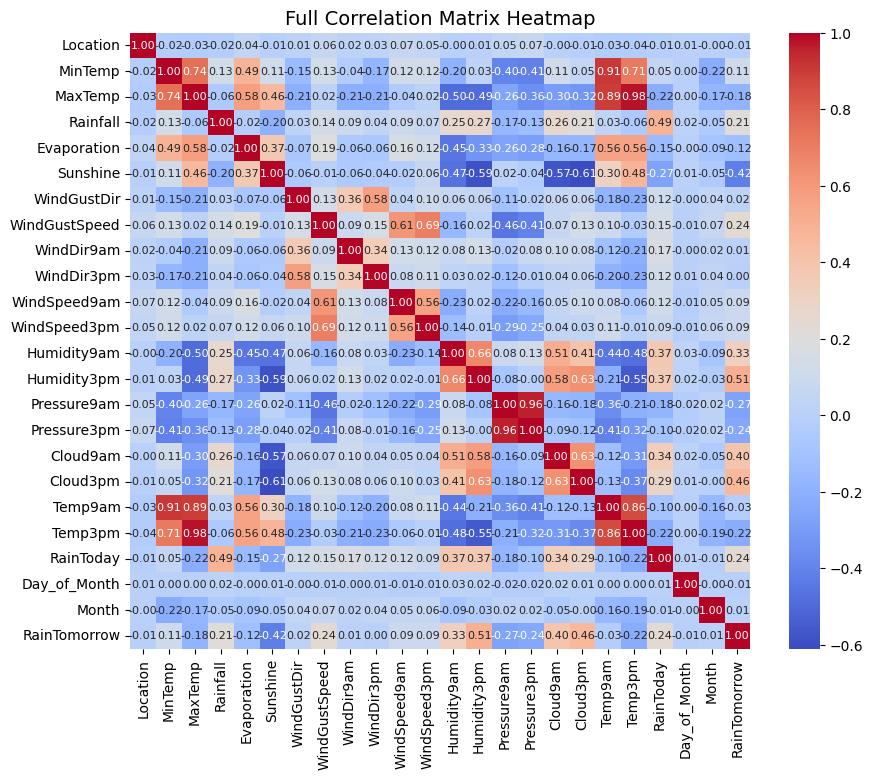

In [25]:
corr_matrix = df.corr()

# Plotting the full correlation matrix heatmap with reduced size
plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})  # Adjust annot_kws size as needed
plt.title('Full Correlation Matrix Heatmap', fontsize=14)  # Adjust the fontsize as needed
plt.xticks(fontsize=10)  # Adjust the fontsize as needed
plt.yticks(fontsize=10)  # Adjust the fontsize as needed
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_pred, y, title):
    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)

    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [29]:
X = df.drop(columns=["MinTemp", "Temp3pm", "RainTomorrow"])
y = df["RainTomorrow"]

Accuracy: 0.8746278531260337


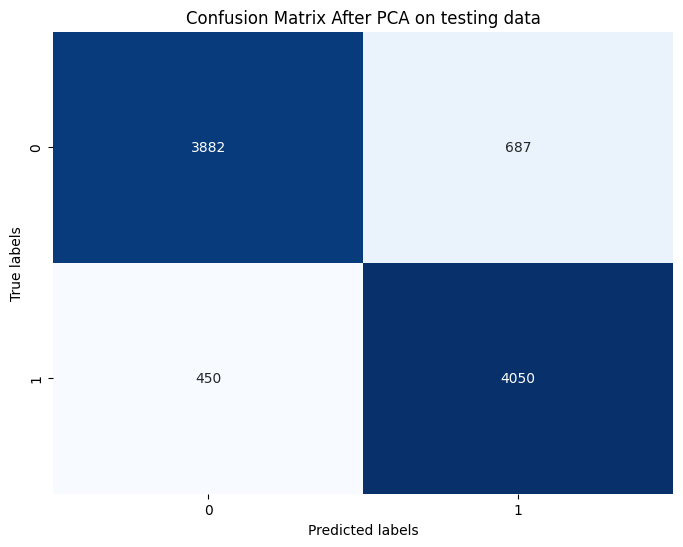

In [51]:
from sklearn.decomposition import PCA

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA for dimensionality reduction
n_components = 12  # Number of components to keep after PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest classifier on the reduced dataset
rf_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix After PCA on testing data')
plt.show()


Accuracy: 1.0


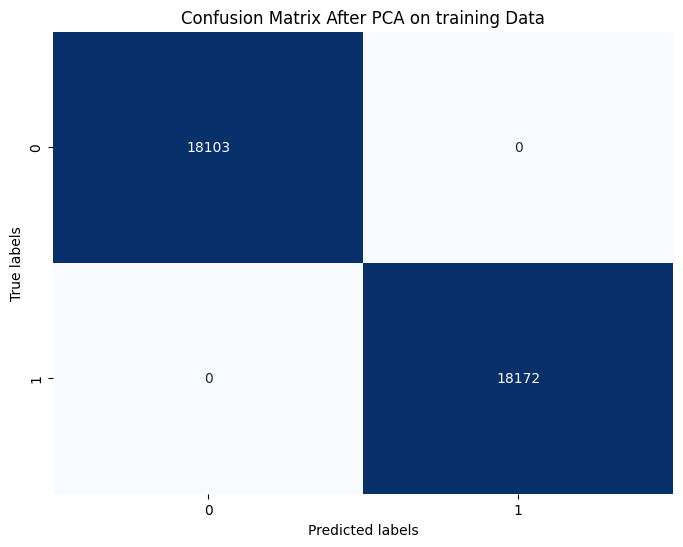

In [54]:
# Make predictions on the training set
y_pred = rf_classifier.predict(X_train_pca)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix After PCA on training Data')
plt.show()

Accuracy: 0.8192744514279413
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4569
           1       0.81      0.83      0.82      4500

    accuracy                           0.82      9069
   macro avg       0.82      0.82      0.82      9069
weighted avg       0.82      0.82      0.82      9069

[[3682  887]
 [ 752 3748]]


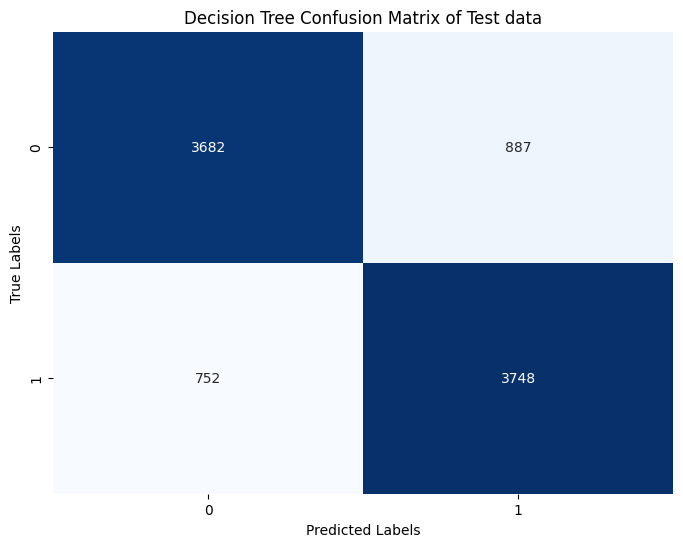

In [30]:
# Testing Accuracy using Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_pred, y_test, title='Decision Tree Confusion Matrix of Test data')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18103
           1       1.00      1.00      1.00     18172

    accuracy                           1.00     36275
   macro avg       1.00      1.00      1.00     36275
weighted avg       1.00      1.00      1.00     36275

[[18103     0]
 [    0 18172]]


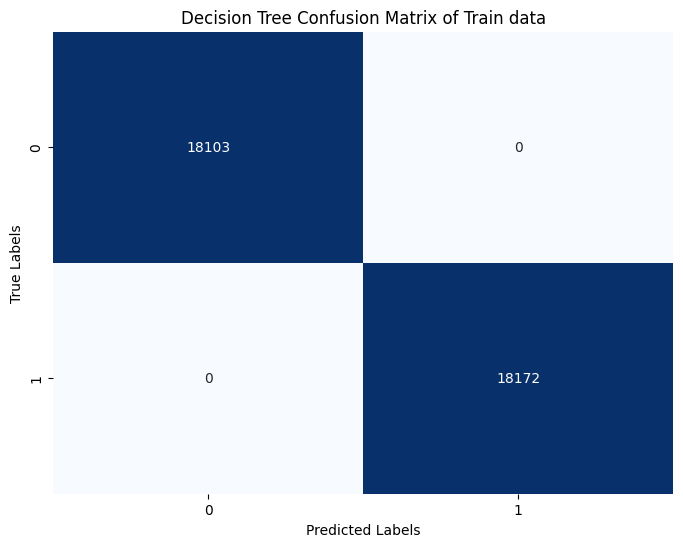

In [32]:
# Training Accuracy using Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

plot_confusion_matrix(y_pred, y_train, title='Decision Tree Confusion Matrix of Train data')

Average Train Accuracy using Random Forest: 0.8774913852515507
[[15768  2313]
 [ 2131 16063]]


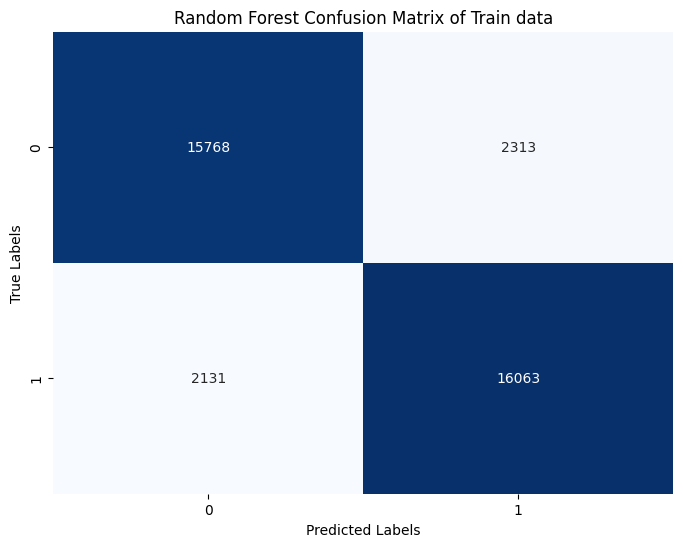

In [33]:
# Predicting on Training Data using Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

rf_clf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=12)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)

print("Average Train Accuracy using Random Forest:", accuracy)
# Confusion matrix for Random Forest
plot_confusion_matrix(y_pred, y_train, title='Random Forest Confusion Matrix of Train data')


0.8371375013783218
[[3806  785]
 [ 692 3786]]


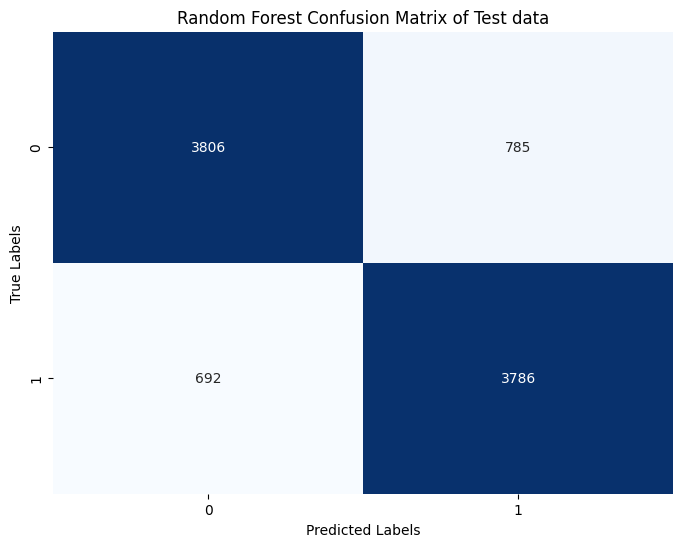

In [35]:
# Predicting over test data using Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Instantiate a Random Forest classifier
rf_clf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test ,y_pred)
print(accuracy)
plot_confusion_matrix(y_pred, y_test, title='Random Forest Confusion Matrix of Test data')

Average Test Accuracy using Logistic Regression: 0.7782555959863271
[[3582  987]
 [1024 3476]]


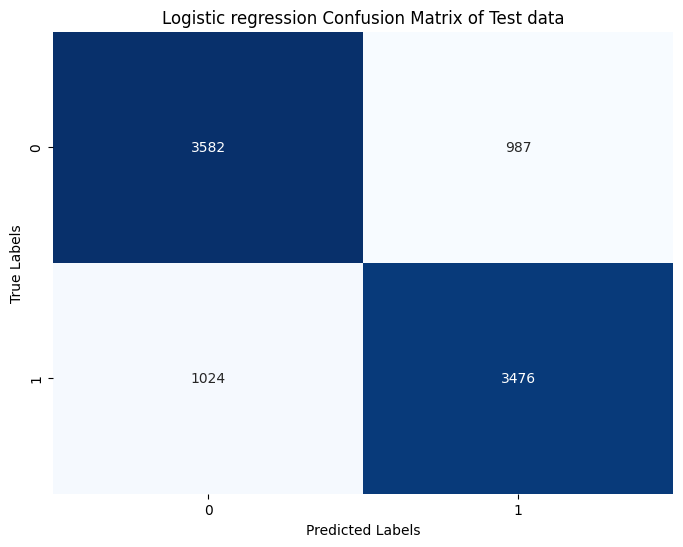

In [36]:
# Predicting on Testing Data using Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Average Test Accuracy using Logistic Regression:", accuracy)
plot_confusion_matrix(y_pred, y_test, title='Logistic regression Confusion Matrix of Test data')

Average Training Accuracy using Logistic Regression: 0.7835975189524466
[[14336  3767]
 [ 4083 14089]]


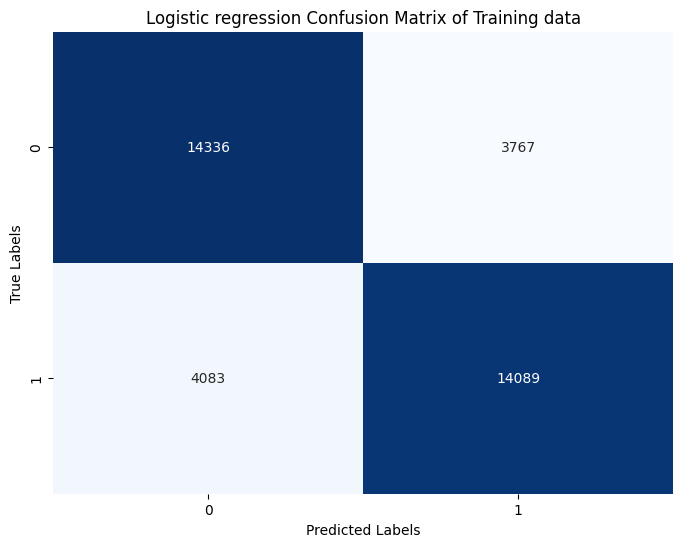

In [37]:
# Predicting on Training Data using Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)

print("Average Training Accuracy using Logistic Regression:", accuracy)
plot_confusion_matrix(y_pred, y_train, title='Logistic regression Confusion Matrix of Training data')

Average Train Accuracy using SVC: 0.8507787732598208
[[15134  2969]
 [ 2444 15728]]


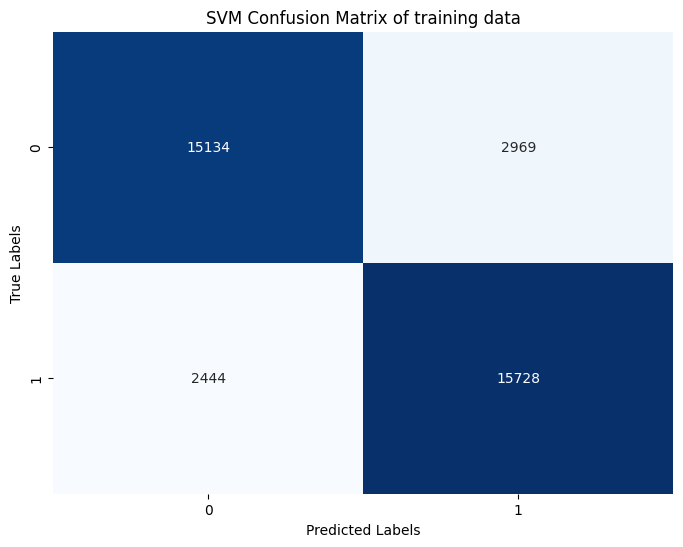

In [38]:
# Predicting on Training Data using SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels of test set
y_pred = svm_classifier.predict(X_train_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

print("Average Train Accuracy using SVC:", accuracy)
# Confusion matrix for SVM
plot_confusion_matrix(y_pred, y_train, title='SVM Confusion Matrix of training data')

Average Test Accuracy using SVC: 0.8329474032418128
[[3708  861]
 [ 654 3846]]


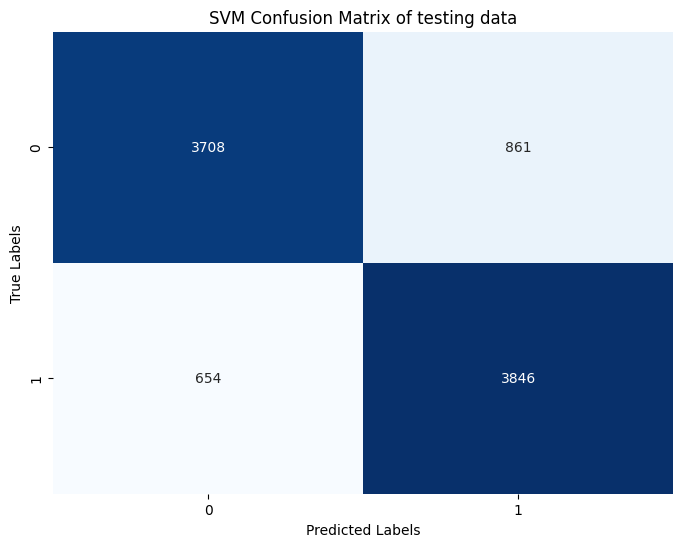

In [41]:
# Predicting on Testing Data using SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels of test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Average Test Accuracy using SVC:", accuracy)
plot_confusion_matrix(y_pred, y_test, title='SVM Confusion Matrix of testing data')

Epoch 1/10
1021/1021 [==============================] - 4s 2ms/step - loss: 0.4918 - accuracy: 0.7554 - val_loss: 0.4530 - val_accuracy: 0.7839
Epoch 2/10
1021/1021 [==============================] - 3s 3ms/step - loss: 0.4470 - accuracy: 0.7868 - val_loss: 0.4458 - val_accuracy: 0.7861
Epoch 3/10
1021/1021 [==============================] - 3s 3ms/step - loss: 0.4355 - accuracy: 0.7947 - val_loss: 0.4397 - val_accuracy: 0.7905
Epoch 4/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4279 - accuracy: 0.7992 - val_loss: 0.4302 - val_accuracy: 0.8021
Epoch 5/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4228 - accuracy: 0.8038 - val_loss: 0.4276 - val_accuracy: 0.8037
Epoch 6/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4181 - accuracy: 0.8085 - val_loss: 0.4298 - val_accuracy: 0.8026
Epoch 7/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4152 - accuracy: 0.8095 - val_loss: 0.4237 - val_accuracy:

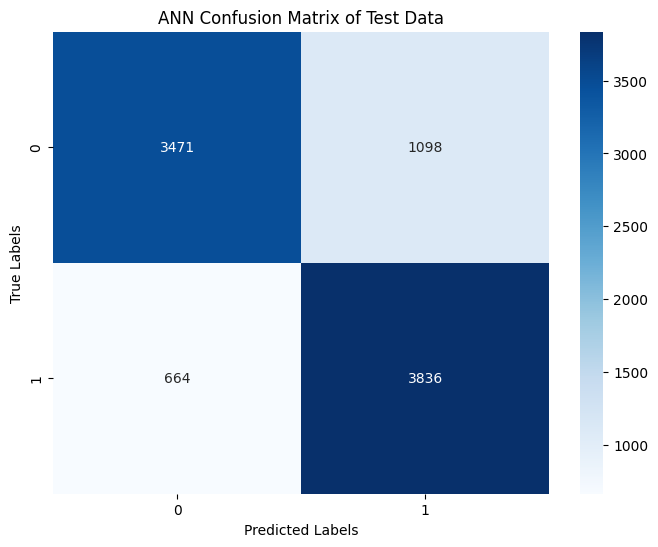

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


# Predict probabilities on test data
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix of Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Epoch 1/10
1021/1021 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.7537 - val_loss: 0.4544 - val_accuracy: 0.7842
Epoch 2/10
1021/1021 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.7867 - val_loss: 0.4373 - val_accuracy: 0.7900
Epoch 3/10
1021/1021 [==============================] - 3s 3ms/step - loss: 0.4376 - accuracy: 0.7942 - val_loss: 0.4294 - val_accuracy: 0.7993
Epoch 4/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.7993 - val_loss: 0.4317 - val_accuracy: 0.7993
Epoch 5/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4228 - accuracy: 0.8034 - val_loss: 0.4228 - val_accuracy: 0.8062
Epoch 6/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4186 - accuracy: 0.8060 - val_loss: 0.4201 - val_accuracy: 0.8073
Epoch 7/10
1021/1021 [==============================] - 2s 2ms/step - loss: 0.4141 - accuracy: 0.8082 - val_loss: 0.4170 - val_accuracy:

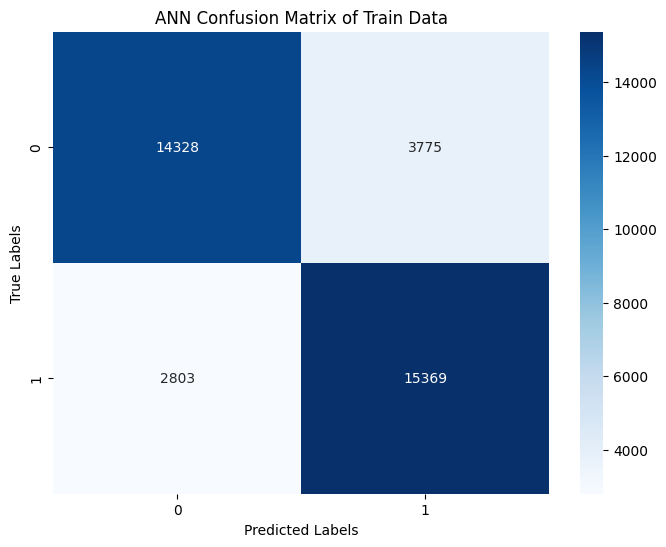

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_train_scaled, y_train)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on test data
y_pred_prob = model.predict(X_train_scaled)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix of Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()